In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
gamesdf = pd.read_csv('game.csv')
gamesdf = gamesdf.drop('gameDate', axis=1)
gamesdf = gamesdf.set_index('gameID')

goaldf = pd.read_csv('_SELECT_DISTINCT_gl_gameID_gl_goalDate_as_gameDate_gl_teamID_cou.csv')
goaldf['gameDate'] = pd.to_datetime(goaldf['gameDate'], format='%Y-%m-%d')
goaldf = goaldf.set_index('gameID')
goaldf.tail()


,gameDate,teamID,goals,winner
gameID,,,,
20231104TB@OTT,2023-11-04,TB,6,TB
20231104WPG@ARI,2023-11-04,ARI,3,WPG
20231104WPG@ARI,2023-11-04,WPG,5,WPG
20231105NJ@CHI,2023-11-05,CHI,2,NJ
20231105NJ@CHI,2023-11-05,NJ,4,NJ


In [3]:
windf = goaldf.loc[goaldf['winner'] == goaldf['teamID']]
windf = windf.drop('winner', axis=1)
lossdf = goaldf.loc[goaldf['winner'] != goaldf['teamID']]
lossdf = lossdf.drop({'winner', 'gameDate'}, axis=1)

In [4]:
gamesdf = gamesdf.join(windf)
gamesdf = gamesdf.drop({'winner'}, axis=1)
gamesdf = gamesdf.rename(columns={'teamID': 'winningTeam', 'goals':'winningTeamGoals'})

In [5]:
gamesdf.head()

,visitors,home,gameDate,winningTeam,winningTeamGoals
gameID,,,,,
20231010CHI@PIT,CHI,PIT,2023-10-10,CHI,4.0
20231010NSH@TB,NSH,TB,2023-10-10,TB,5.0
20231010SEA@VGK,SEA,VGK,2023-10-10,LV,4.0
20231011CHI@BOS,CHI,BOS,2023-10-11,BOS,3.0
20231011COL@LA,COL,LA,2023-10-11,COL,5.0


In [6]:
lossdf.head()

,teamID,goals
gameID,,
20231010CHI@PIT,PIT,2
20231010NSH@TB,NSH,3
20231010SEA@VGK,SEA,1
20231011CHI@BOS,CHI,1
20231011COL@LA,LA,2


In [7]:
gamesdf = gamesdf.join(lossdf)
gamesdf = gamesdf.rename(columns={'teamID': 'loosingTeam', 'goals':'loosingTeamGoals'})
gamesdf.sample(10)


,visitors,home,gameDate,winningTeam,winningTeamGoals,loosingTeam,loosingTeamGoals
gameID,,,,,,,
20231021WAS@MON,WAS,MON,2023-10-21,MON,3.0,WAS,2.0
20231030CHI@ARI,CHI,ARI,2023-10-30,ARI,8.0,CHI,1.0
20231010CHI@PIT,CHI,PIT,2023-10-10,CHI,4.0,PIT,2.0
20231011MON@TOR,MON,TOR,2023-10-11,TOR,6.0,MON,5.0
20231102NSH@SEA,NSH,SEA,2023-11-02,SEA,4.0,NSH,2.0
20231029MIN@NJ,MIN,NJ,2023-10-29,NJ,4.0,MIN,3.0
20231029COL@BUF,COL,BUF,2023-10-29,BUF,4.0,NaN,NaN
20231027CHI@VGK,CHI,VGK,NaT,NaN,NaN,NaN,NaN
20231021NYI@BUF,NYI,BUF,2023-10-21,BUF,3.0,NYI,1.0


In [8]:
gamesdf = gamesdf.fillna(0)
gamesdf.sample(10)
type(gamesdf)

pandas.core.frame.DataFrame

In [18]:
gamesdf = gamesdf[gamesdf['gameDate'] != 0]
gamesdf.sample(10)
goals = gamesdf[['winningTeamGoals','loosingTeamGoals']]
goals = goals.reset_index(drop=True) 
goals = goals.sort_values(by=['winningTeamGoals','loosingTeamGoals'])
goals = goals.value_counts()
goals = goals.sort_values()
goals = pd.DataFrame(goals)
goals = goals.reset_index(drop=False) 
goals.sample(1)

,winningTeamGoals,loosingTeamGoals,count
14,6.0,3.0,6


[Text(0.5, 0, 'Winning Team Goals'), Text(0, 0.5, 'Loosing Team Goals')]

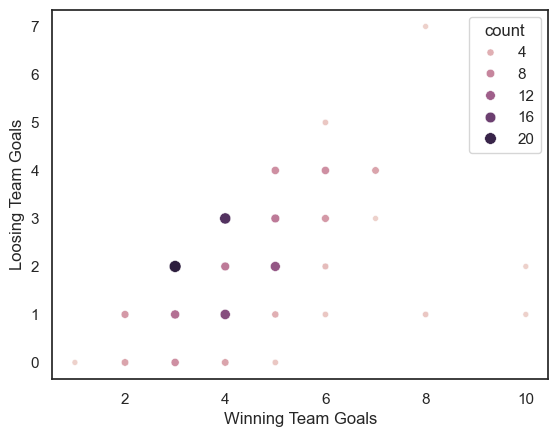

In [31]:
ax = sns.scatterplot(data=goals, x='winningTeamGoals', y='loosingTeamGoals', size='count', hue='count')
ax.set(xlabel='Winning Team Goals', ylabel='Loosing Team Goals')